In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [102]:
df = pd.read_csv(r"D:\project\dataset\Customer Segmentation.csv")

In [104]:
def detect_outliers_iqr(data):
    outliers_dict = {}
    
    for column in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers_dict[column] = outliers.index.tolist()
    return outliers_dict

In [106]:
outliers = detect_outliers_iqr(df)

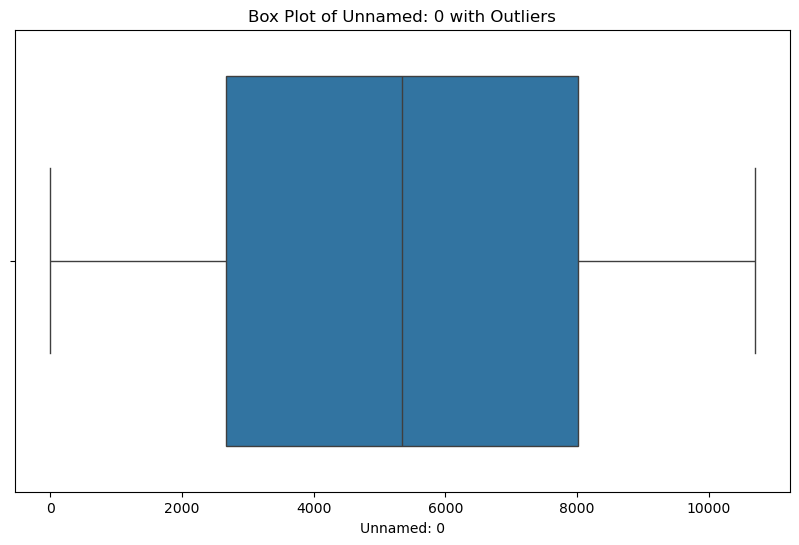

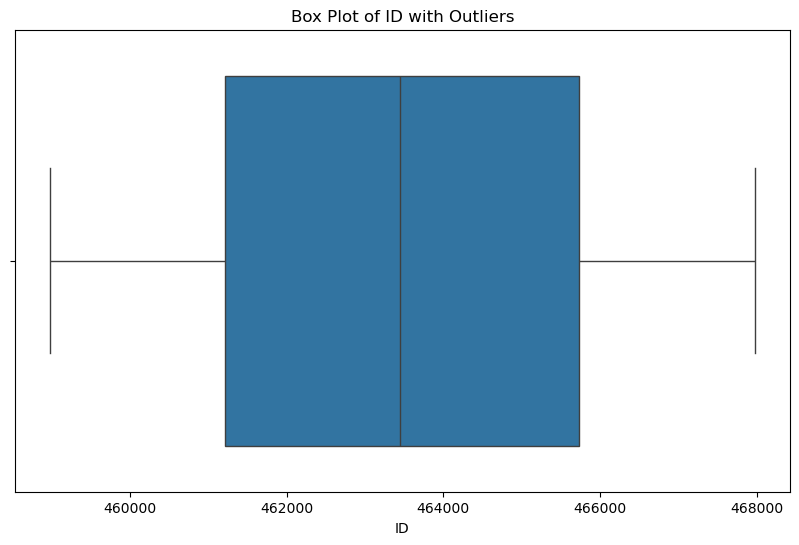

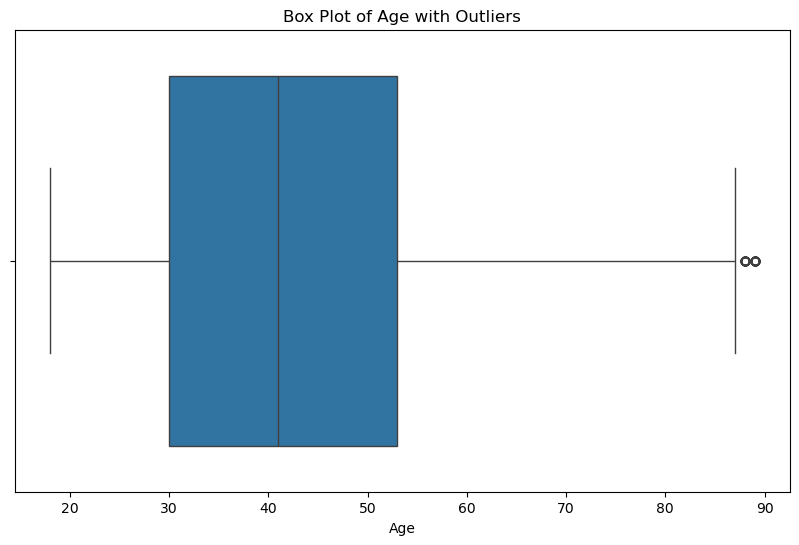

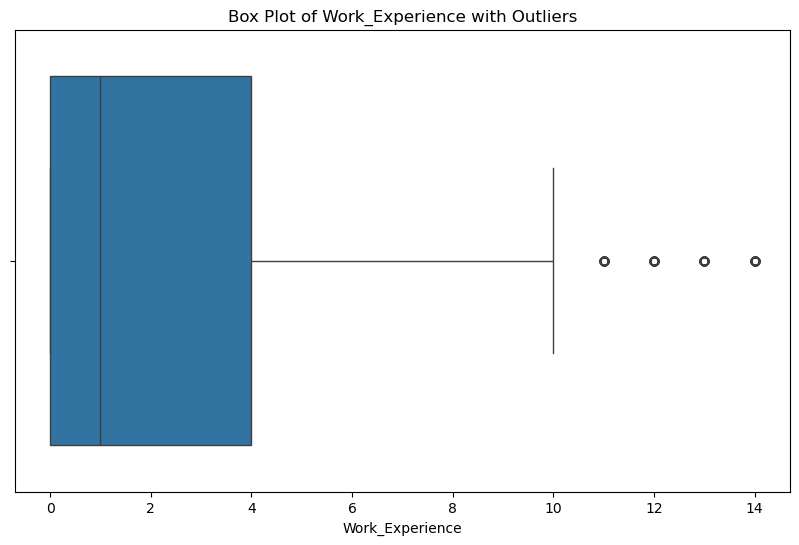

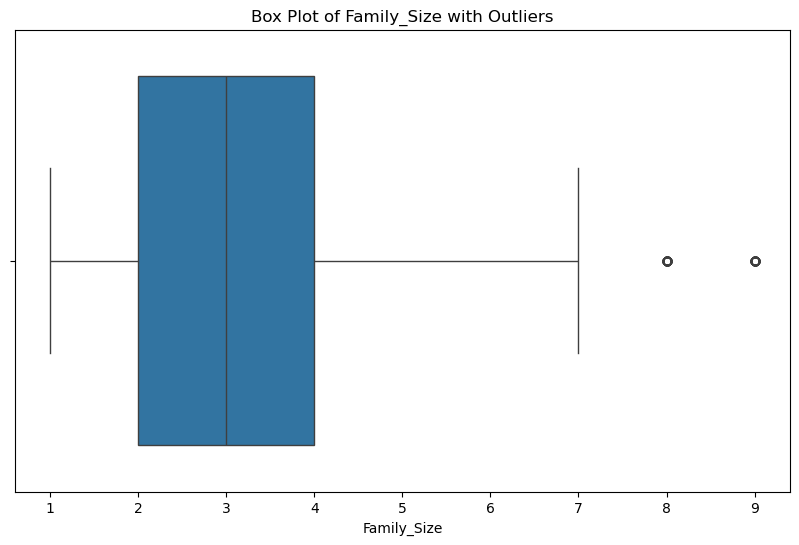

In [108]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column} with Outliers')
    plt.xlabel(column)
    plt.show()